___
# Ciência dos Dados - Projeto 3

___
## Nome 1 - Augusto Franco de Paula

## Nome 2 - Gabriel Heusi Pereira Bueno de Camargo

## Nome 3 - Pedro Henrique Carvalho Daher

___

___

## Introdução

   A partir de um interesse sobre carros, o grupo optou por fazer um modelo de previsão dos preços de carros e ainda analisar aqueles considerados "Overpriced", ou seja acima do preço considerado padrão para determinado modelo. 
   A base de dados utilizada para o estudo é de 2017 e avalia apenas carros americanos, dessa forma deve-se explorar esta afim de possibilitar tal modelo de predição. Para isso será importante avaliar quais as variáveis de maior influência sobre o preço de um carro para que ao fim haja uma comparação entre o preço real do carro e seu preço esperado a partir das variáveis que o definem. Por fim a análise de carros acima do preço servirá como dado de eficiência do estudo 
   Dessa forma baseou-se em artigos cientificos e estudos que avaliam os modelos de distribuicão destes preços, entre eles estão: 

___
## Minerando dados e características do Dataset

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import os
import math
from sklearn.linear_model import Ridge, Lasso
from sys import stdin
from numpy import arange
import numpy as np
import seaborn as sns
from sklearn import preprocessing, cross_validation, neighbors

In [9]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())
data = pd.read_csv('data.csv')

Esperamos trabalhar no diretório
C:\Users\Pedro Daher\Downloads


## Base de dados

In [168]:
data = shuffle(data)
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
4125,Cadillac,Escalade ESV,2017,premium unleaded (recommended),420.0,8.0,AUTOMATIC,four wheel drive,4.0,"Luxury,Performance",Large,4dr SUV,20,15,1624,78995
9281,GMC,Sierra 1500 Classic,2007,regular unleaded,285.0,8.0,AUTOMATIC,rear wheel drive,2.0,Flex Fuel,Large,Regular Cab Pickup,19,15,549,24140
8366,Aston Martin,Rapide S,2014,premium unleaded (required),550.0,12.0,AUTOMATIC,rear wheel drive,4.0,"Exotic,High-Performance",Large,Sedan,19,13,259,198250
3447,Dodge,Dakota,2008,regular unleaded,302.0,8.0,AUTOMATIC,rear wheel drive,4.0,NaN,Compact,Crew Cab Pickup,19,14,1851,28520
11461,Subaru,WRX,2016,premium unleaded (recommended),268.0,4.0,MANUAL,all wheel drive,4.0,Performance,Compact,Sedan,27,20,640,28895


In [169]:
sns.heatmap(data.corr(), annot=True, fmt=".1f")

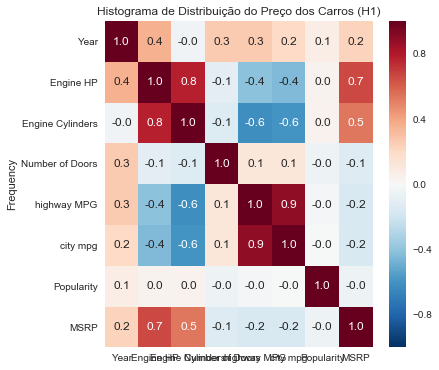

   A partir do mapa mostrado acima é possível identificar a influência (correlação) de uma variável sobre o preço de um carro. Dessa forma basta analisar e perceber que as três que apresentam maior proporcionalidade são: Ano de fabricação (Year), Potência do Motor (Engine HP) e número de cilindros (Engine Cylinders). Vale lembrar que isto era esperado, afinal essa ferramenta só é capaz de comparar dados quantitativos.

## Análise Descritiva

   A partir desta seção será reavaliada a ideia das variáveis e sua distribuição de acordo com o preço. Como por exemplo a "Engine Cylinders" será categorizado como uma espécie de força fornecida pelos cilindros ao carro e ainda observar onde a predominância do preço dos carros, separando em faixas de valor de compra/venda. 

In [10]:
data = data.loc[data['Engine Cylinders']>0,['Year','Engine HP','Engine Cylinders','MSRP']]
data = data.loc[data['MSRP']<125000,['Year','Engine HP','Engine Cylinders','MSRP']]
data = data.loc[data['Engine HP']>0,['Year','Engine HP','Engine Cylinders','MSRP']]
data.columns=["Ano","Potência","Cilindros","Price"]
data.dropna()
data.head()

,Ano,Potência,Cilindros,Price
0,2011,335.0,6.0,46135
1,2011,300.0,6.0,40650
2,2011,300.0,6.0,36350
3,2011,230.0,6.0,29450
4,2011,230.0,6.0,34500


In [ ]:
#Check 1 está completo até aqui, realizado pelos 3 alunos trabalhando juntos durante as aulas.